In [15]:
import pandas as pd

stock_data = pd.read_csv('fundamentals.csv', usecols = ['Fixed Assets', 'Earnings Before Tax', 'Gross Profit'])
stock_data.head()

,Earnings Before Tax,Fixed Assets,Gross Profit
0,-2.445000e+09,1.340200e+10,1.435600e+10
1,-2.180000e+09,1.925900e+10,1.572400e+10
2,3.212000e+09,2.308400e+10,2.703000e+10
3,4.616000e+09,2.751000e+10,2.989400e+10
4,6.240740e+08,1.292547e+09,3.098036e+09


<Axes: xlabel='Fixed Assets', ylabel='Earnings Before Tax'>

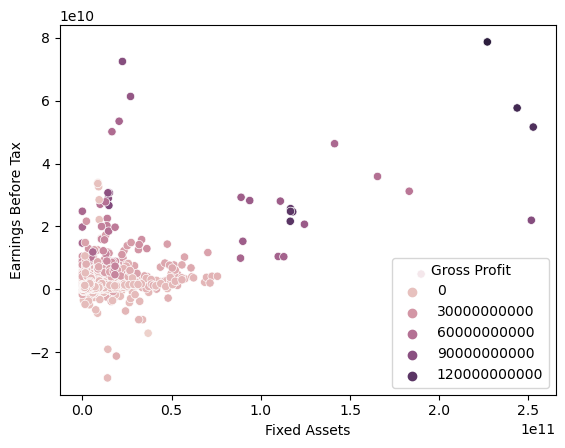

In [17]:
import seaborn as sns

sns.scatterplot(data = stock_data, x = 'Fixed Assets', y = 'Earnings Before Tax', hue = 'Gross Profit')

In [19]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(stock_data[['Fixed Assets', 'Earnings Before Tax']], stock_data[['Gross Profit']], test_size=0.33, random_state=0)

In [20]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

C:\Users\jeswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=0)

<Axes: xlabel='Fixed Assets', ylabel='Earnings Before Tax'>

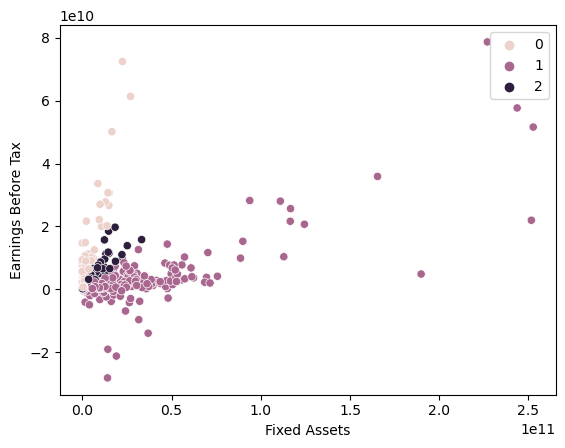

In [22]:
sns.scatterplot(data = X_train, x = 'Fixed Assets', y = 'Earnings Before Tax', hue = kmeans.labels_)

<Axes: ylabel='Gross Profit'>

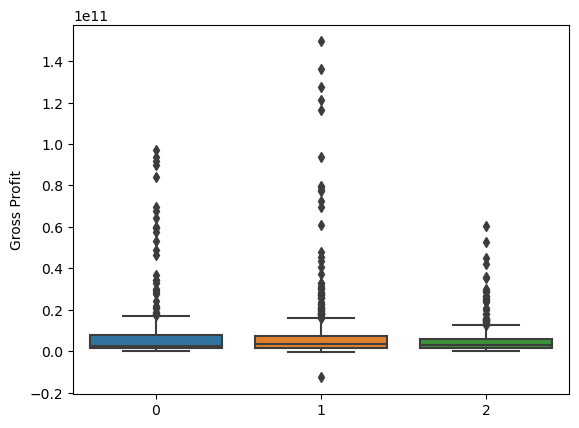

In [23]:
sns.boxplot(x = kmeans.labels_, y = y_train['Gross Profit'])

In [24]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='manhattan')

0.6059715181769517

In [25]:
K = range(3, 9)
fits = []
score = []

for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    fits.append(model)
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

C:\Users\jeswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\jeswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\jeswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\jeswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

<Axes: xlabel='Fixed Assets', ylabel='Earnings Before Tax'>

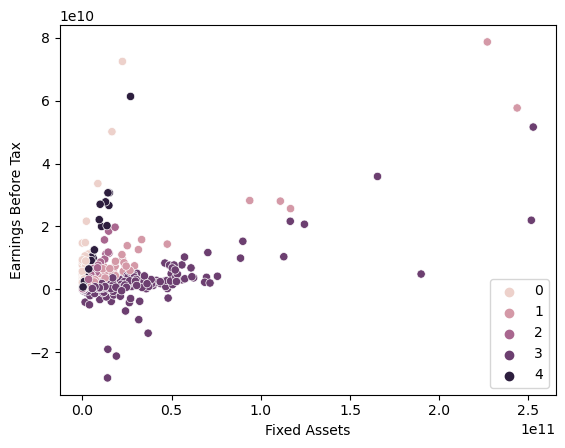

In [26]:
sns.scatterplot(data = X_train, x = 'Fixed Assets', y = 'Earnings Before Tax', hue = fits[2].labels_ )